In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns',None)
from sklearn.feature_selection import SelectFromModel,SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import random
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [4]:
house= pd.read_csv('all_data_clean.csv', na_filter = False)

In [5]:
house.shape

(2553, 82)

In [5]:
ord_colnames = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
ord_dict = {}
ord_dict['LotShape'] = ['IR3', 'IR2', 'IR1', 'Reg']
ord_dict['LandSlope'] = ['Sev', 'Mod', 'Gtl']
ord_dict['OverallQual'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['OverallCond'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['ExterQual'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['ExterCond'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtExposure'] = ['NoneListed', 'No', 'Mn', 'Av', 'Gd']
ord_dict['BsmtFinType1'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['BsmtFinType2'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['HeatingQC'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['KitchenQual'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Functional'] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ord_dict['FireplaceQu'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageFinish'] = ['NoneListed', 'Unf', 'RFn', 'Fin']
ord_dict['GarageQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['PoolQC'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Fence'] = ['NoneListed', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

# Trasforms Labels to Numbers
for i in range(len(ord_colnames)):
    house[ord_colnames[i]] = house[ord_colnames[i]].apply(lambda x: ord_dict[ord_colnames[i]].index(x))

In [8]:
house.head(10)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA
0,1,909176150,856,126000,30,RL,70.0,7890,Pave,NoneListed,3,Lvl,Corner,2,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,1,3,238.0,1,0.0,618.0,856.0,GasA,3,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,3,4,7,1,4,Detchd,1939.0,1,2.0,399.0,3,3,Y,0,0,0,0,166,0,0,0,NoneListed,0,3,2010,WD,Normal,147.196262
1,1,907250050,2000,305900,20,RL,80.0,10386,Pave,NoneListed,3,Lvl,Inside,2,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,4,3,PConc,4,3,1,6,1464.0,1,0.0,536.0,2000.0,GasA,5,Y,SBrkr,2000,0,0,1.0,0.0,2,0,3,1,4,8,7,0,0,Attchd,2004.0,3,3.0,888.0,3,3,Y,168,0,0,0,0,0,0,0,NoneListed,0,7,2007,WD,Normal,152.950000
2,1,909276070,1717,194000,50,RL,80.0,12400,Pave,NoneListed,3,HLS,Inside,1,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,4,3,2,4,602.0,1,0.0,299.0,901.0,GasA,3,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,3,7,7,1,4,Attchd,1940.0,1,1.0,410.0,3,3,Y,0,0,0,0,113,0,0,0,NoneListed,0,2,2006,WD,Normal,112.987769
3,2,905476230,1049,139500,120,RL,110.0,4235,Pave,NoneListed,3,Lvl,Inside,2,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4,3,2,6,552.0,5,393.0,104.0,1049.0,GasA,3,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,4,5,7,0,0,Attchd,1957.0,3,1.0,266.0,3,3,Y,0,105,0,0,0,0,0,0,NoneListed,0,2,2009,WD,Normal,132.983794
4,2,909425140,1839,257500,20,RL,70.0,14442,Pave,NoneListed,3,Lvl,Inside,2,Crawfor,Norm,Norm,1Fam,1Story,6,7,1957,2004,Hip,CompShg,CemntBd,CmentBd,BrkFace,106.0,3,3,PConc,3,3,1,6,1186.0,1,0.0,291.0,1477.0,GasA,5,Y,SBrkr,1839,0,0,1.0,0.0,2,0,3,1,4,7,7,2,3,Attchd,1965.0,3,2.0,416.0,3,3,Y,0,87,0,0,200,0,0,0,NoneListed,0,6,2007,WD,Normal,140.021751
5,2,534278190,894,117600,20,RL,42.0,8680,Pave,NoneListed,3,Lvl,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,1960,Hip,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,0.0,1,0.0,894.0,894.0,GasA,3,Y,SBrkr,894,0,0,0.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1984.0,1,1.0,312.0,3,3,Y,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,131.543624
6,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoneListed,3,Lvl,Inside,2,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3,3,1,5,737.0,1,0.0,100.0,837.0,GasA,5,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,4,5,7,0,0,Detchd,1930.0,1,1.0,216.0,3,1,N,154,0,42,86,0,0,0,0,NoneListed,0,11,2007,WD,Normal,124.775225
7,3,535301080,882,116000,20,RL,60.0,11556,Pave,NoneListed,3,Lvl,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,6,1952,1952,Gable,CompShg,MetalSd,MetalSd,Stone,52.0,3,3,CBlock,3,3,1,3,148.0,1,0.0,572.0,720.0,GasA,5,Y,FuseA,882,0,0,1.0,0.0,1,0,2,1,4,4,7,0,0,Attchd,1952.0,1,1.0,240.0,3,3,Y,0,0,0,0,0,0,0,3,NoneListed,0,5,2008,WD,Normal,131.519274
8,3,534204120,1073,156000,20,RL,79.0,10289,Pave,NoneListed,3,Lvl,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,BrkFace,168.0,3,3,CBlock,3,3,1,5,836.0,1,0.0,237.0,1073.0,GasA,3,Y,SBrkr,1073,0,0,1.0,0.0,1,1,3,1,3,6,7,0,0,Attchd,1965.0,2,2.0,515.0,3,3,Y,0,0,0,0,0,0,0,0,NoneListed,0,6,2007,WD,Normal,145.386766
9,4,535377150,1039,114000,70,RL,80.0,8146,Pave,None

In [6]:
house['MSSubClass'] = house['MSSubClass'].astype(str)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2553 non-null   int64  
 1   PID              2553 non-null   int64  
 2   GrLivArea        2553 non-null   int64  
 3   SalePrice        2553 non-null   int64  
 4   MSSubClass       2553 non-null   object 
 5   MSZoning         2553 non-null   object 
 6   LotFrontage      2553 non-null   float64
 7   LotArea          2553 non-null   int64  
 8   Street           2553 non-null   object 
 9   Alley            2553 non-null   object 
 10  LotShape         2553 non-null   int64  
 11  LandContour      2553 non-null   object 
 12  LotConfig        2553 non-null   object 
 13  LandSlope        2553 non-null   int64  
 14  Neighborhood     2553 non-null   object 
 15  Condition1       2553 non-null   object 
 16  Condition2       2553 non-null   object 
 17  BldgType      

#### Setting up variables to use for modeling

In [ ]:
#Numericals

#SalePrice
num = house[['GrLivArea', 'LotFrontage', 'LotArea',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']]

#SalePricePerGLA
num1 = house[['LotFrontage', 'LotArea',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']]

In [8]:
Categoricals

cat= house.dtypes[house.dtypes == "object"].index

categories = house[cat]

cat_dummies = pd.get_dummies(house[cat],drop_first=True)

cat_dummies= cat_dummies.astype(object)

In [10]:
X = pd.concat((cat_dummies, num),axis=1)
X1 = pd.concat((cat_dummies, num1),axis=1)

In [11]:
#target variables
y= house['SalePricePerGLA']
y1= house['SalePrice']
y2 = np.log(house['SalePrice'])
y3 = np.log(house['SalePricePerGLA'])

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
import random

np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=21) #SalePrice

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y3, test_size=0.25, random_state=21) #log SalePricePerGLA

X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.25, random_state=21) #SalePricePerGLA


#### Scaled variables/ SalePrice: SVR- rbf

In [13]:
#Scale values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)
X_train = pd.DataFrame(X_trains, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_tests, index=X_test.index, columns=X_test.columns)

In [291]:
#Grid
from sklearn.svm import SVR
import sklearn.model_selection as ms
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr.set_params(kernel='rbf')

grid = {'C':[.1, 1, 10, 100, 1000], 
              'gamma' : [0.00001, 0.0001, 0.001, .01], 
              'epsilon':[0.1,0.2,0.3,0.4,0.5]}

cv = KFold(n_splits=10, shuffle= True, random_state=42)

grid = ms.GridSearchCV(svr, grid, cv=cv, return_train_score = True, n_jobs = -1)

In [292]:
#results
result = grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.score(X_test, y_test))
print(result.best_params_)

0.9183627624392644
0.9205428197441602
{'C': 10, 'epsilon': 0.1, 'gamma': 0.0001}


#### Scaled variables/ Log SalePricePerGLA: SVR- rbf

In [14]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X1_train)
X_tests1 = scaler.transform(X1_test)
X1_train = pd.DataFrame(X_train1, index=X1_train.index, columns=X1_train.columns)
X1_test = pd.DataFrame(X_tests1, index=X1_test.index, columns=X1_test.columns)

In [295]:
#Same grid but for logSalePrice

result = grid.fit(X1_train, y1_train)

print(grid.best_score_) #0.82510
print(grid.best_estimator_.score(X1_test, y1_test)) #0.79242
print(result.best_params_) #{'C': 1000, 'epsilon': 0.1, 'gamma': 1e-05}

KeyboardInterrupt: 

scaled/ spgla - rbf

In [15]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X2_train)
X_tests2 = scaler.transform(X2_test)
X2_train = pd.DataFrame(X_train2, index=X2_train.index, columns=X2_train.columns)
X2_test = pd.DataFrame(X_tests2, index=X2_test.index, columns=X2_test.columns)

In [296]:
#Same Grid but for SalePricePerGLA

result = grid.fit(X2_train, y2_train)

print(grid.best_score_) #0.81833
print((grid.best_estimator_.score(X2_test, y2_test)) #0.81774
print(result.best_params_) #{'C': 1000, 'epsilon': 0.5, 'gamma': 0.0001}

KeyboardInterrupt: 

scaled/ spgla - sigmoid

In [ ]:
#Different Gridsearch for Sigmoid
from sklearn.svm import SVR
import sklearn.model_selection as ms
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr.set_params(kernel='sigmoid')

grid = {'C':[.1, 1, 10, 100, 1000], 
              'gamma' : [0.00001, 0.0001, 0.001, .01], 
              'epsilon':[0.1,0.2,0.3,0.4,0.5]}

cv = KFold(n_splits=10, shuffle= True, random_state=42)

grid = ms.GridSearchCV(svr, grid, cv=cv, return_train_score = True, n_jobs = -1)

In [297]:
result = grid.fit(X2_train, y2_train)

print(grid.best_score_) #0.79310
print(grid.best_estimator_.score(X2_test, y2_test)) #0.79868
print(result.best_params_) # {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}

KeyboardInterrupt: 

#### Scaled/ spgla - linear

In [16]:
#Different Grid for SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr_params = {'kernel': ['linear'], 'gamma': [1e-4, 1e-3, 0.01, 0.1],'C': [.01,.1, 1, 10],'epsilon': [1e-3, 0.01, 0.1, 0.2, 0.5]}
svr_cv = GridSearchCV(svr,svr_params, cv=10)

In [ ]:
svr_cv.fit(X2_train, y2_train)

print(svr_cv.best_score_) #0.8097381987878937
print(svr_cv.best_estimator_.score(X2_test, y2_test)) #0.7983250776664886

In [28]:
svr_cv.best_params_ #{'C': 1, 'epsilon': 0.5, 'gamma': 0.0001, 'kernel': 'linear'} 

{'C': 1, 'epsilon': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}

#### Scaled/ log spgla - linear

In [60]:
svr_cv.fit(X1_train, y1_train)
print(svr_cv.best_score_(X1_train, y1_train))
print(svr_cv.best_estimator_.score(X1_test, y1_test)) #log

0.8685210496104686
0.7889213932543027


Decided to go with SVR - Linear: {'C': 1, 'epsilon': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}

#### Top features: Linear, scaled/spgla

In [18]:
svm= SVR(C=1, epsilon=0.5, gamma= 0.0001, kernel= 'linear')
svm.fit(X2_train, y2_train)

SVR(C=1, epsilon=0.5, gamma=0.0001, kernel='linear')

In [38]:
a= svm.coef_.reshape(-1,1)
b= pd.DataFrame(a, index= X2_train.columns, columns= ['Coefs']).sort_values(by= 'Coefs', ascending=False).reset_index()
b= b.rename(columns={"index": "Features"})
b
#top= pd.DataFrame(a, index= X2_train.columns, columns= ['Coefs']).sort_values(by= 'Coefs', ascending=False).head(10)

,Features,Coefs
0,OverallQual,6.123672
1,YearBuilt,5.962527
2,OverallCond,5.253630
3,HouseStyle_1Story,4.808384
4,Condition1_Norm,3.564337
...,...,...
210,Exterior2nd_HdBoard,-2.243610
211,MSSubClass_60,-2.787500
212,MSSubClass_160,-3.446482
213,2ndFlrSF,-9.628135


In [61]:
bottom= pd.DataFrame(a, index= X2_train.columns, columns= ['Coefs']).sort_values(by= 'Coefs', ascending=False).tail(10)

In [71]:
#df3 = pd.concat((top,bottom),axis=0).reset_index()
#df3.plot(x='index', y='Coefs',kind='barh',figsize=(11,11), title= 'SVR - Linear: Coefficients',
        #xlabel='Coefficients', ylabel= 'Features')

In [75]:
df3.rename(columns={"index": "Features", 'Coefs': 'Coeficients'})

,Features,Coeficients
0,OverallQual,6.123672
1,YearBuilt,5.962527
2,OverallCond,5.253630
3,HouseStyle_1Story,4.808384
4,Condition1_Norm,3.564337
5,BsmtFinSF1,3.511294
6,LotArea,3.434646
7,HouseStyle_SFoyer,3.340436
8,Neighborhood_NridgHt,3.181820
9,MSSubClass_20,3.000201


#### Top Changeable Features

In [72]:
unchangeable_feats = ([feat for feat in list(b.Features) if 'Neighborhood' in feat] +
 [feat for feat in list(b.Features) if 'Condition1' in feat] +
 [feat for feat in list(b.Features) if 'Condition2' in feat] +
 [feat for feat in list(b.Features) if 'Exterior1st' in feat] +
 [feat for feat in list(b.Features) if 'MSSubClass' in feat] +
 [feat for feat in list(b.Features) if 'SaleCondition' in feat] +
 [feat for feat in list(b.Features) if 'GarageType' in feat] +
 [feat for feat in list(b.Features) if 'LandContour' in feat] +
 [feat for feat in list(b.Features) if 'MSZoning' in feat] +
 [feat for feat in list(b.Features) if 'LotShape' in feat] + 
 [feat for feat in list(b.Features) if 'HouseStyle' in feat] +
 [feat for feat in list(b.Features) if 'ExterQual' in feat] +                      
 [feat for feat in list(b.Features) if 'const' in feat] +                      
 [feat for feat in list(b.Features) if 'YearBuilt' in feat] +                      
 [feat for feat in list(b.Features) if '2ndFlrSF' in feat] +                      
 [feat for feat in list(b.Features) if '1stFlrSF' in feat] +                     
 [feat for feat in list(b.Features) if 'GarageYrBlt' in feat] +
 [feat for feat in list(b.Features) if 'GarageArea' in feat] +                    
 [feat for feat in list(b.Features) if 'LotArea' in feat] +                      
 [feat for feat in list(b.Features) if 'TotalBsmtSF' in feat] + 
 [feat for feat in list(b.Features) if 'MoSold' in feat] + 
 [feat for feat in list(b.Features) if 'YrSold' in feat]+
 [feat for feat in list(b.Features) if 'PoolQC' in feat] +
 [feat for feat in list(b.Features) if 'BldgType' in feat]+
 [feat for feat in list(b.Features) if 'LotConfig' in feat]+                      
 [feat for feat in list(b.Features) if 'GarageCars' in feat]+
 [feat for feat in list(b.Features) if 'YearRemodAdd' in feat])

<AxesSubplot:title={'center':'SVR(Linear): Improvable Coefficients'}, ylabel='Coefficients'>

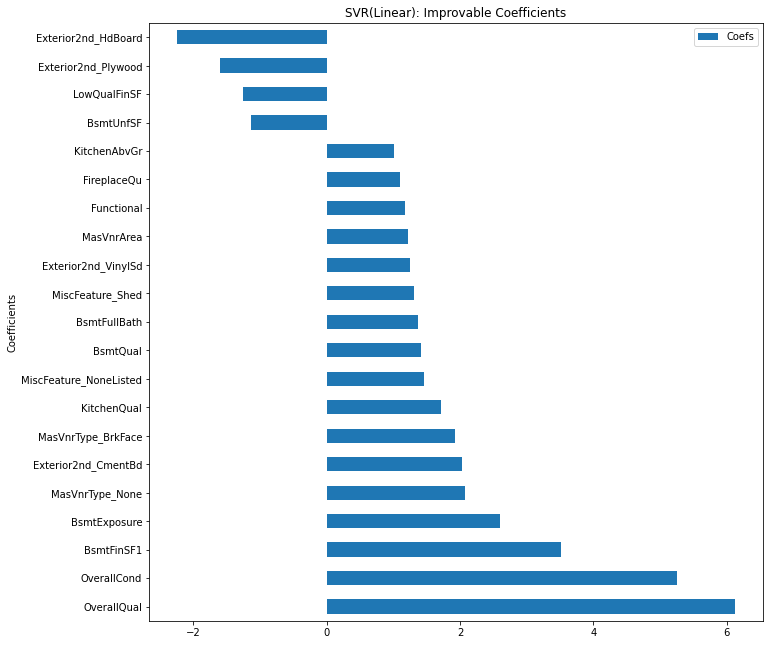

In [119]:
changeable_cols = [feat for feat in list(b['Features']) if feat not in unchangeable_feats]
feat_importance = b[b['Features'].isin(changeable_cols)]
v= feat_importance.tail(4)
f= feat_importance.head(17)
f= f.merge(v, how='outer')

f.plot(x='Features', y='Coefs',kind='barh',figsize=(11,11), title= 'SVR- Linear: Improvable Coefficients',
        xlabel='Coefficients', ylabel= 'Features')

#### Get total Predictions from Model

In [82]:
svm= SVR(C=1, epsilon =0.5, gamma= 0.0001, kernel = 'linear')

In [100]:
all_x = pd.concat((X2_train, X2_test),axis=0)
all_y = pd.concat((y2_train, y2_test),axis=0)
ttl_preds = list(zip(all_y.index,svm.predict(all_x)))

#### We decided to look at 80 % of houses with lowest GrLivArea or GLA

In [101]:
top_twenty = list(house.nlargest((int(len(X)*.2)),'GrLivArea').index)
bottom_eighty = list(house.nsmallest((int(len(X)*.8)),'GrLivArea').index)
house8= house.iloc[bottom_eighty]

In [102]:
pred_df = pd.DataFrame((np.array(ttl_preds)),columns=['ignore','Prediction']).drop('ignore',axis=1)

In [103]:
house8= house8.merge(pred_df,left_index=True,right_index=True)

In [104]:
house8

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Prediction
2472,918,534450090,334,39300,20,RL,50.0,5000,Pave,NoneListed,3,Low,Inside,1,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,2,2,7,0,0,NoneListed,1946.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2007,WD,Normal,117.664671,134.500041
2409,855,902205070,407,46500,20,RM,62.0,7311,Pave,NoneListed,3,Lvl,Corner,2,OldTown,Norm,Norm,1Fam,1Story,2,5,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,407.0,407.0,GasA,3,N,FuseA,407,0,0,0.0,0.0,1,0,1,1,3,3,7,0,0,Detchd,1949.0,1,1.0,297.0,2,3,Y,76,0,120,0,0,0,0,0,NoneListed,0,3,2008,WD,Abnorml,114.250614,146.133658
1636,551,909175080,438,60000,30,RL,60.0,8400,Pave,NoneListed,3,Bnk,Inside,2,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,2,1,3,290.0,1,0.0,0.0,290.0,GasA,3,N,FuseF,438,0,0,0.0,0.0,1,0,1,1,2,3,7,0,0,Detchd,1930.0,1,1.0,246.0,3,3,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,WD,Normal,136.986301,131.808575
1913,645,911175430,480,35311,20,C (all),50.0,9000,Pave,NoneListed,3,Lvl,Inside,2,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3,3,3,4,50.0,1,0.0,430.0,480.0,GasA,3,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,3,4,7,0,0,Detchd,1958.0,1,1.0,308.0,3,3,Y,0,0,0,0,0,0,0,0,NoneListed,0,10,2006,WD,Abnorml,73.564583,53.441050
111,38,902206020,492,61500,30,RM,52.0,7830,Pave,NoneListed,3,Lvl,Inside,2,OldTown,Norm,Norm,1Fam,1Story,3,5,1921,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,BrkTil,2,3,1,2,416.0,1,0.0,76.0,492.0,GasA,3,Y,SBrkr,492,0,0,1.0,0.0,1,0,1,1,3,3,7,0,0,Detchd,1921.0,1,1.0,200.0,2,3,N,0,0,78,0,0,0,0,0,NoneListed,0,6,2006,WD,Normal,125.000000,151.922013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,334,903429080,1826,155000,70,RM,70.0,2500,Pave,Pave,3,Lvl,Corner,2,OldTown,Norm,Norm,1Fam,2Story,7,8,1915,2005,Gable,CompShg,Stucco,Stucco,None,0.0,4,3,PConc,3,3,1,5,299.0,1,0.0,611.0,910.0,GasA,5,Y,SBrkr,916,910,0,1.0,0.0,1,1,4,1,5,7,5,1,4,Attchd,1939.0,1,1.0,164.0,2,2,Y,0,0,0,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,84.884995,131.602195
405,137,903206160,1827,202500,70,RL,69.0,11737,Pave,NoneListed,2,Bnk,Inside,2,BrkSide,Norm,Norm,1Fam,2Story,6,7,1924,1996,Gambrel,CompShg,BrkComm,Stucco,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,848.0,848.0,GasW,3,N,SBrkr,1017,810,0,0.0,0.0,1,0,2,1,3,9,7,1,4,Detchd,1943.0,1,1.0,240.0,2,3,Y,27,36,42,0,0,0,0,4,NoneListed,0,5,2006,WD,Normal,110.837438,120.763980
1289,434,910201180,1828,150909,70,RM,50.0,9060,Pave,NoneListed,3,Lvl,Inside,2,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,BrkTil,4,3,1,5,548.0,1,0.0,311.0,859.0,GasA,5,Y,SBrkr,942,886,0,0.0,0.0,2,0,3,1,4,6,7,0,0,Detchd,1925.5,0,0.0,0.0,0,0,Y,174,0,212,0,0,0,0,3,NoneListed,0,3,2007,WD,Al

In [105]:
house8['Predicted SalePrice'] = house8['Prediction'] * house8['GrLivArea']

In [106]:
avg_nh = pd.DataFrame(house8.groupby('Neighborhood')[['SalePricePerGLA']].agg(['mean',np.std]))

In [107]:
avg_nh.columns=['Avg_by_NH', 'SD_by_NH']
avg_nh = avg_nh.reset_index()

underval_start = pd.merge(house8,avg_nh,left_on='Neighborhood',right_on='Neighborhood')

In [109]:
underval_start['Avg_by_NH']= underval_start['Avg_by_NH'] * underval_start['GrLivArea']
underval_start['SD_by_NH']= underval_start['SD_by_NH'] * underval_start['GrLivArea']

In [110]:
underval_start['SDs_away'] = underval_start['SalePrice']/(underval_start['Avg_by_NH'] - underval_start['SD_by_NH'])
undervalued = underval_start[underval_start['SDs_away']<1]
overval = underval_start[underval_start['SDs_away']>1]

In [115]:
undervalued

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Prediction,Predicted SalePrice,Avg_by_NH,SD_by_NH,SDs_away
6,550,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,270.0,270.0,GasA,4,Y,SBrkr,729,0,0,0.0,0.0,1,0,2,1,3,5,2,0,0,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,148.498936,108255.724215,76520.515886,13865.102846,0.829936
10,457,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,1,1,0.0,1,0.0,264.0,264.0,Grav,2,N,FuseA,800,0,0,0.0,0.0,1,0,1,1,2,4,3,1,1,NoneListed,1962.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,82.787770,66230.216286,83973.131288,15215.476375,0.872630
24,182,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,742.0,742.0,GasA,3,Y,FuseA,779,0,156,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,50.703302,47407.586934,98143.597193,17783.088013,0.989292
38,407,903228070,1142,93000,50,RM,60.0,6000,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1924,1950,Gable,CompShg,Stucco,Stucco,BrkFace,444.0,3,3,BrkTil,3,3,1,3,220.0,1,0.0,248.0,468.0,GasA,4,Y,SBrkr,822,320,0,0.0,0.0,1,0,3,1,3,6,7,0,0,Attchd,1924.0,3,1.0,320.0,3,3,Y,0,0,98,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,81.436077,129.366164,147736.159106,119871.644913,21720.092525,0.947514
54,375,903225160,1290,106900,70,RM,59.0,5870,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Feedr,Feedr,1Fam,2Story,6,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,554.0,554.0,GasA,5,Y,SBrkr,736,554,0,0.0,0.0,1,1,3,1,3,6,7,0,0,Detchd,1926.0,1,1.0,200.0,2,3,Y,38,112,0,0,0,0,0,3,Shed,400,4,2008,WD,Normal,82.868217,114.294818,147440.315599,135406.674202,24534.955654,0.964177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,37,528188090,1626,155000,160,RL,50.0,2448,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,1,0.0,1,0.0,764.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,1,2,1,4,6,7,0,0,BuiltIn,1999.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneListed,0,10,2008,WD,Normal,95.325953,118.839392,193232.852028,261076.104678,43722.071761,0.713122
2012,256,528188060,1626,173000,160,RL,98.0,2268,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,6,567.0,1,0.0,197.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,0,2,1,4,6,7,0,0,BuiltIn,1984.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneLi

#### Train new model with the 80%

In [128]:
num_u = undervalued[['LotFrontage', 'LotArea',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']]

In [129]:
cat= undervalued.dtypes[undervalued.dtypes == "object"].index

categories = undervalued[cat]

cat_dummies = pd.get_dummies(undervalued[cat],drop_first=True)


In [131]:
X = pd.concat((cat_dummies, num_u),axis=1)
y= undervalued['SalePricePerGLA']

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
import random

np.random.seed(10)

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X, y, test_size=0.25, random_state=21)

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains_u = scaler.fit_transform(X_train_u)
X_tests_u = scaler.transform(X_test_u)
X_train_u = pd.DataFrame(X_trains_u, index=X_train_u.index, columns=X_train_u.columns)
X_test_u = pd.DataFrame(X_tests_u, index=X_test_u.index, columns=X_test_u.columns)

In [138]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr_params = {'kernel': ['linear'], 'gamma': [1e-4, 1e-3, 0.01, 0.1],'C': [.01,.1, 1, 10],'epsilon': [1e-3, 0.01, 0.1, 0.2, 0.5]}
svr_cv = GridSearchCV(svr,svr_params, cv=10)

In [160]:
svr_cv.fit(X_train_u, y_train_u)

svr_cv.best_params_
#{'C': [0.1],'epsilon': [0.5],'gamma': [0.0001],'kernel': ['linear']})

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear']})

In [162]:
svm = SVR(C=0.1, epsilon= 0.5, gamma= 0.0001, kernel= 'linear')

In [163]:
svm.fit(X_train_u, y_train_u)

SVR(C=0.1, epsilon=0.5, gamma=0.0001, kernel='linear')

In [168]:
print(svm.score(X_train_u, y_train_u))
print(svm.score(X_test_u, y_test_u))

0.8884763686785758
0.733295767882613


#### Setting up an improved dataset to see if new predictions are greater.

In [188]:
improved= undervalued.drop('Unnamed: 0', axis=1)

In [220]:
improved

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Prediction,Predicted SalePrice,Avg_by_NH,SD_by_NH,SDs_away
6,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,9,9,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,4,3,3,1,135.0,1,0.0,135.0,270.0,GasA,4,Y,SBrkr,729,0,0,1.0,0.0,1,0,2,1,4,5,7,0,4,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,148.498936,108255.724215,76520.515886,13865.102846,0.829936
10,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,9,9,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,4,2,3,1,132.0,1,0.0,132.0,264.0,Grav,2,N,FuseA,800,0,0,1.0,0.0,1,0,1,1,4,4,7,1,4,NoneListed,1962.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,82.787770,66230.216286,83973.131288,15215.476375,0.872630
24,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,RRAn,Feedr,1Fam,1Story,9,9,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,4,3,3,1,371.0,1,0.0,371.0,742.0,GasA,3,Y,FuseA,779,0,156,1.0,0.0,1,0,2,1,4,4,7,0,4,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,50.703302,47407.586934,98143.597193,17783.088013,0.989292
38,903228070,1142,93000,50,RM,60.0,6000,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Norm,Norm,1Fam,1.5Fin,9,9,1924,1950,Gable,CompShg,Stucco,Stucco,BrkFace,444.0,3,3,BrkTil,4,3,3,3,344.0,1,0.0,124.0,468.0,GasA,4,Y,SBrkr,822,320,0,1.0,0.0,1,0,3,1,4,6,7,0,4,Attchd,1924.0,3,1.0,320.0,3,3,Y,0,0,98,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,81.436077,129.366164,147736.159106,119871.644913,21720.092525,0.947514
54,903225160,1290,106900,70,RM,59.0,5870,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Feedr,Feedr,1Fam,2Story,9,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,BrkTil,4,3,3,1,277.0,1,0.0,277.0,554.0,GasA,5,Y,SBrkr,736,554,0,1.0,0.0,1,1,3,1,4,6,7,0,4,Detchd,1926.0,1,1.0,200.0,2,3,Y,38,112,0,0,0,0,0,3,Shed,400,4,2008,WD,Normal,82.868217,114.294818,147440.315599,135406.674202,24534.955654,0.964177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,528188090,1626,155000,160,RL,50.0,2448,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,9,9,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,3,1,382.0,1,0.0,382.0,764.0,GasA,5,Y,SBrkr,764,862,0,1.0,0.0,2,1,2,1,4,6,7,0,4,BuiltIn,1999.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneListed,0,10,2008,WD,Normal,95.325953,118.839392,193232.852028,261076.104678,43722.071761,0.713122
2012,528188060,1626,173000,160,RL,98.0,2268,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,9,9,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,3,6,665.5,1,0.0,98.5,764.0,GasA,5,Y,SBrkr,764,862,0,1.0,0.0,2,0,2,1,4,6,7,0,4,BuiltIn,1984.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneListed,0,7,2009,WD,Normal,106.39606

Adjusting Features

In [190]:
improved['OverallQual']=improved.loc[:,'OverallQual'] = 9
improved['OverallCond']=improved.loc[:,'OverallCond'] = 9
improved['BsmtExposure']=improved.loc[:,'BsmtExposure'] = 3
improved['BsmtQual']=improved.loc[:,'BsmtQual'] = 4
improved['KitchenQual']=improved.loc[:,'KitchenQual'] = 4
improved['Functional']=improved.loc[:,'Functional'] = 7
improved['FireplaceQu']=improved.loc[:,'FireplaceQu'] = 4

In [191]:
improved['BsmtFinSF1']= improved.loc[:,'BsmtFinSF1'] = improved['BsmtFinSF1'] + (improved['BsmtUnfSF']/ 2)

In [192]:
improved['BsmtFullBath']= improved.loc[:,'BsmtFullBath'] = improved['BsmtFullBath'] + 1

In [193]:
improved['BsmtUnfSF']= improved.loc[:,'BsmtUnfSF'] = improved['BsmtUnfSF'] - (improved['BsmtUnfSF']/ 2)

In [195]:
cat= improved.dtypes[improved.dtypes == "object"].index

categories = improved[cat]

cat_dummies = pd.get_dummies(improved[cat],drop_first=True)

In [196]:
cat_dummies

,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NoneListed,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NoneListed,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoneListed,PavedDrive_P,PavedDrive_Y,MiscFeature_Shed,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0
38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [197]:
cat_dummies['MasVnrType_None']=cat_dummies.loc[:,'MasVnrType_None'] = 1
cat_dummies['Exterior2nd_CmentBd']=cat_dummies.loc[:,'Exterior2nd_CmentBd'] = 1
cat_dummies['MiscFeature_Shed']=cat_dummies.loc[:,'MiscFeature_Shed'] = 1

In [199]:
num_i = improved[['LotFrontage', 'LotArea',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']]

In [200]:
X = pd.concat((cat_dummies, num_i),axis=1)
y= improved['SalePricePerGLA']

In [204]:
from sklearn.model_selection import train_test_split, cross_val_score
import random

np.random.seed(10)

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.25, random_state=21)

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains_i = scaler.fit_transform(X_train_i)
X_tests_i = scaler.transform(X_test_i)
X_train_i = pd.DataFrame(X_trains_i, index=X_train_u.index, columns=X_train_i.columns)
X_test_i = pd.DataFrame(X_tests_i, index=X_test_u.index, columns=X_test_i.columns)

In [231]:
X_test_i

,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NoneListed,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Norm,Condition2_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NoneListed,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoneListed,PavedDrive_P,PavedDrive_Y,MiscFeature_Shed,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
1116,-0.065938,-0.378899,-0.148741,-0.422577,-0.272798,-0.065938,1.0,-0.485071,-0.498647,-0.263523,-0.065938,-0.065938,-0.386334,-0.163299,-0.234082,8.717798,-1.581139,-0.485071,0.299370,-0.163299,-0.114708,-0.114708,0.223607,-0.212718,-0.212718,-1.707412,-0.132745,-0.212718,-0.093454,-0.363803,-0.148741,-0.290701,-0.148741,-0.065938,-0.176777,-0.163299,-0.244199,-0.498647,-0.114708,-0.176777,-0.065938,-0.148741,-0.324443,-0.114708,-0.29937,5.279678,-0.234082,-0.065938,-0.065938,-0.093454,-0.316228,0.518875,-0.065938,-0.148741,-0.176777,0.093454,0.0,-0.148741,-0.386334,-0.316228,-0.272798,15.165751,-0.755929,-0.843274,-0.065938,-0.065938,0.386334,-0.132745,-0.332531,-0.114708,0.0,-0.065938,-0.065938,-0.148741,-0.065938,-0.163299,-0.436717,-0.464531,-0.272798,-0.148741,-0.599019,1.978609,-0.176777,-0.093454,-0.114708,-0.093454,0.0,0.0,-0.408248,0.0,-0.464531,-0.324443,-0.093454,-0.132745,-0.572351,2.090955,-0.234082,-0.512148,0.0,-0.093454,-0.244199,-0.961769,-0.652630,-0.234082,-0.093454,-0.093454,-0.093454,-0.114708,-0.132745,-2.327373,-0.212718,-0.093454,-2.033060,-0.912871,-0.114708,-0.148741,-0.132745,1.360828,-0.378899,-0.148741,-2.121320,0.

In [232]:
all_x = pd.concat((X_train_i, X_test_i),axis=0)
all_y = pd.concat((y_train_i, y_test_i),axis=0)
ttl_preds_i = list(zip(improved.PID, all_y.index, svm.predict(all_x),))
ttl_preds_i

[(534451170, 1509, 93.29186293008685),
 (903231060, 238, 67.05044199775125),
 (903204095, 1111, 90.15629406052247),
 (903228070, 678, 92.04904622840128),
 (903225160, 486, 78.95974220195941),
 (903230100, 214, 69.26859260244439),
 (534451150, 324, 67.96998016206624),
 (903233220, 381, 78.88411239121852),
 (903228060, 676, 71.84137561034117),
 (903231190, 1281, 108.37451782485829),
 (903231030, 469, 71.83075895984297),
 (903204040, 660, 87.3884859928287),
 (903202170, 857, 88.30837630783653),
 (902205010, 1820, 106.01123127379712),
 (903430130, 1602, 100.94673602637863),
 (902331010, 1464, 102.96515716069179),
 (902207130, 1187, 100.90829774566383),
 (902207110, 1994, 114.85294645326405),
 (535379060, 1927, 112.1957845230322),
 (902402260, 511, 86.05222411238113),
 (902205020, 114, 73.66175872264968),
 (902427040, 1360, 113.5806490142676),
 (902401090, 1662, 90.39958110177433),
 (535383070, 179, 70.4694543996229),
 (902134060, 1449, 99.33159892968155),
 (902202150, 1063, 81.862206847226

In [248]:
pred_df1 = pd.DataFrame((np.array(ttl_preds_i)),columns=['PID', 'd', 'Improved Prediction'])

In [249]:
pred_df1 = pred_df1.drop('d', axis=1)

In [254]:
pred_df1['PID']= pred_df1['PID'].astype(np.int64)

In [242]:
undervalued

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Prediction,Predicted SalePrice,Avg_by_NH,SD_by_NH,SDs_away
6,550,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,270.0,270.0,GasA,4,Y,SBrkr,729,0,0,0.0,0.0,1,0,2,1,3,5,2,0,0,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,148.498936,108255.724215,76520.515886,13865.102846,0.829936
10,457,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,1,1,0.0,1,0.0,264.0,264.0,Grav,2,N,FuseA,800,0,0,0.0,0.0,1,0,1,1,2,4,3,1,1,NoneListed,1962.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,82.787770,66230.216286,83973.131288,15215.476375,0.872630
24,182,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,742.0,742.0,GasA,3,Y,FuseA,779,0,156,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,50.703302,47407.586934,98143.597193,17783.088013,0.989292
38,407,903228070,1142,93000,50,RM,60.0,6000,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1924,1950,Gable,CompShg,Stucco,Stucco,BrkFace,444.0,3,3,BrkTil,3,3,1,3,220.0,1,0.0,248.0,468.0,GasA,4,Y,SBrkr,822,320,0,0.0,0.0,1,0,3,1,3,6,7,0,0,Attchd,1924.0,3,1.0,320.0,3,3,Y,0,0,98,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,81.436077,129.366164,147736.159106,119871.644913,21720.092525,0.947514
54,375,903225160,1290,106900,70,RM,59.0,5870,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Feedr,Feedr,1Fam,2Story,6,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,554.0,554.0,GasA,5,Y,SBrkr,736,554,0,0.0,0.0,1,1,3,1,3,6,7,0,0,Detchd,1926.0,1,1.0,200.0,2,3,Y,38,112,0,0,0,0,0,3,Shed,400,4,2008,WD,Normal,82.868217,114.294818,147440.315599,135406.674202,24534.955654,0.964177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,37,528188090,1626,155000,160,RL,50.0,2448,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,1,0.0,1,0.0,764.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,1,2,1,4,6,7,0,0,BuiltIn,1999.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneListed,0,10,2008,WD,Normal,95.325953,118.839392,193232.852028,261076.104678,43722.071761,0.713122
2012,256,528188060,1626,173000,160,RL,98.0,2268,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,6,567.0,1,0.0,197.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,0,2,1,4,6,7,0,0,BuiltIn,1984.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneLi

In [256]:
total= undervalued.merge(pred_df1, on='PID')

In [267]:
total

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA,Prediction,Predicted SalePrice,Avg_by_NH,SD_by_NH,SDs_away,Improved Prediction,Improved Saleprice,Gained_SP
0,550,534451170,729,52000,30,RL,56.0,4130,Pave,NoneListed,2,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,270.0,270.0,GasA,4,Y,SBrkr,729,0,0,0.0,0.0,1,0,2,1,3,5,2,0,0,NoneListed,1939.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,7,2008,WD,Normal,71.330590,148.498936,108255.724215,76520.515886,13865.102846,0.829936,93.291863,68009.768076,16009.768076
1,457,903231060,800,60000,30,RM,51.0,6120,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,1,1,0.0,1,0.0,264.0,264.0,Grav,2,N,FuseA,800,0,0,0.0,0.0,1,0,1,1,2,4,3,1,1,NoneListed,1962.0,0,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,NoneListed,0,1,2009,ConLw,Normal,75.000000,82.787770,66230.216286,83973.131288,15215.476375,0.872630,67.050442,53640.353598,-6359.646402
2,182,903204095,935,79500,40,RM,50.0,9100,Pave,NoneListed,3,Lvl,Inside,2,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,742.0,742.0,GasA,3,Y,FuseA,779,0,156,0.0,0.0,1,0,2,1,3,4,7,0,0,Detchd,1988.0,1,1.0,308.0,3,3,P,0,0,0,0,0,0,0,0,Shed,600,8,2008,WD,Normal,85.026738,50.703302,47407.586934,98143.597193,17783.088013,0.989292,90.156294,84296.134947,4796.134947
3,407,903228070,1142,93000,50,RM,60.0,6000,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1924,1950,Gable,CompShg,Stucco,Stucco,BrkFace,444.0,3,3,BrkTil,3,3,1,3,220.0,1,0.0,248.0,468.0,GasA,4,Y,SBrkr,822,320,0,0.0,0.0,1,0,3,1,3,6,7,0,0,Attchd,1924.0,3,1.0,320.0,3,3,Y,0,0,98,0,0,0,0,0,NoneListed,0,6,2009,WD,Normal,81.436077,129.366164,147736.159106,119871.644913,21720.092525,0.947514,92.049046,105120.010793,12120.010793
4,375,903225160,1290,106900,70,RM,59.0,5870,Pave,NoneListed,3,Lvl,Corner,2,BrkSide,Feedr,Feedr,1Fam,2Story,6,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,4,BrkTil,3,3,1,1,0.0,1,0.0,554.0,554.0,GasA,5,Y,SBrkr,736,554,0,0.0,0.0,1,1,3,1,3,6,7,0,0,Detchd,1926.0,1,1.0,200.0,2,3,Y,38,112,0,0,0,0,0,3,Shed,400,4,2008,WD,Normal,82.868217,114.294818,147440.315599,135406.674202,24534.955654,0.964177,78.959742,101858.067441,-5041.932559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,37,528188090,1626,155000,160,RL,50.0,2448,Pave,NoneListed,3,Lvl,Inside,2,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,4,3,PConc,4,3,1,1,0.0,1,0.0,764.0,764.0,GasA,5,Y,SBrkr,764,862,0,0.0,0.0,2,1,2,1,4,6,7,0,0,BuiltIn,1999.0,2,2.0,474.0,3,3,Y,0,27,0,0,0,0,0,0,NoneListed,0,10,2008,WD,Normal,95.325953,118.839392,193232.852028,261076.104678,43722.071761,0.713122,99.423080,161661.928031,6661.928031
304,256,528188060,1626,173000,160,RL,98.0,

In [259]:
total['Improved Saleprice'] = total['Improved Prediction'] * total['GrLivArea']

In [260]:
total['Gained_SP'] = total['Improved Saleprice'] - total['SalePricePerGLA'] * total['GrLivArea']

In [271]:
total1 = total[['PID', 'SalePrice', 'Predicted SalePrice' , 'Improved Saleprice', 'Gained_SP']]

In [287]:
top= total1.sort_values(ascending= False, by= 'Gained_SP').head(50)

#### Top 50 improved SalePrices

In [288]:
top

,PID,SalePrice,Predicted SalePrice,Improved Saleprice,Gained_SP
49,911102170,40000,128783.841251,144679.576967,104679.576967
72,908102130,100000,132423.820414,175381.853215,75381.853215
53,903484080,50000,181850.962839,124014.841518,74014.841518
16,902207130,12789,68844.361795,83955.703724,71166.703724
33,902103090,111500,178562.387598,180595.400269,69095.400269
41,909250210,102000,198674.335859,171037.401392,69037.401392
105,905200290,155000,235537.130490,222860.427953,67860.427953
232,914476020,126000,157385.177484,193396.864352,67396.864352
161,534427010,84900,205178.436373,151260.138728,66360.138728
170,535456050,130000,237605.517201,196101.135201,66101.135201
